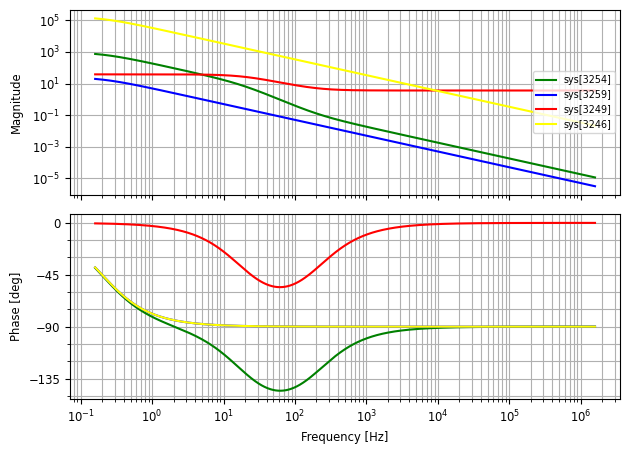

In [272]:
import control as co
import numpy as np

V_IN, V_OUT = 5, 170
N_PS = 1 / 10
L = 10e-6
R_LOAD, C_OUT = 170e+3, 4.7e-6
V_REF = 1.26
f_SW = 350e+3
T_SW = 1 / f_SW
D_a = 2 * L * V_OUT ** 2 / (V_IN ** 2 * T_SW * R_LOAD)
D_b = (V_IN + N_PS * V_OUT) / (N_PS * V_OUT) * D_a
R_FB1 = 330e+3
R_FB2 = R_FB1 * V_REF / (V_OUT - V_REF)

R_s = 0.006
V_SL = 92e-3
S_n, S_f, S_e = V_IN / L, N_PS * V_OUT / L, V_SL * f_SW / R_s

g_m, A_ea_vol = 800e-6, 38
R_ea_o = A_ea_vol / g_m
f_p2, f_z3 = 19, 200
R_c1 = f_p2 / (f_z3 - f_p2) * R_ea_o
C_c1 = 1 / (R_c1 * 2 * np.pi * f_z3)

G_vci2 = N_PS * 1 / 2 * (V_IN * D_a / L * (D_b / D_a - 1) / S_n + D_b - D_a) / R_s * S_n / (S_e + S_n)

Z_o = co.tf([1], [C_OUT, 1 / R_LOAD])

G_div = R_FB2 / (R_FB1 + R_FB2)

G_fb = A_ea_vol * co.tf([1 / (2 * np.pi * f_z3), 1], [1 / (2 * np.pi * f_p2), 1])

G_overall_loop = G_vci2 * Z_o * G_div * G_fb

co.bode(G_overall_loop, np.logspace(0, 7, 1000), Hz=True, color='green')
co.bode(G_vci2 * Z_o * G_div, np.logspace(0, 7, 1000), Hz=True, color='blue')
co.bode(G_fb, np.logspace(0, 7, 1000), Hz=True, color='red')
co.bode(Z_o, np.logspace(0, 7, 1000), Hz=True, color='yellow')

In [247]:
print(G_vci2, G_vcda, G_vcdb, Z_o)

0.019886363636363643 9.943181818181818 12.867647058823525 <TransferFunction>: sys[2821]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


          1
---------------------
4.7e-06 s + 5.882e-06



In [209]:
print(D_a, D_b)


0.00476 0.0061600000000000005


In [210]:
print(R_FB2 / (R_FB1 + R_FB2) * V_OUT)


1.2599999999999998


In [211]:
print(R_FB1, R_FB2)


330000.0 2464.146023468057


In [212]:
R_FA = 4.503 * 10 ** 11 * f_SW ** -1.26

print(R_FA)


46556.05912734094


In [213]:
print(R_c1, C_c1)

1900000.0000000002 8.376575952205018e-09


In [214]:
# delta_i_p = V_IN / L * D * T_SW
# delta_i_s = delta_i_p * N_PS
# delta_v_o = V_OUT / (R_LOAD * C_OUT) * D * T_SW
# i_L = V_OUT / (N_PS * D_PRIME * R_LOAD)

# print(delta_i_p, delta_v_o, i_L)


In [273]:
print(R_ea_o)

47500.0
